In [1]:
import matplotlib.pyplot as plt

from pyspark import SparkContext

In [2]:
mxm_data = sc.pickleFile("../data/mxm_dataset_all/")
metadata = sc.pickleFile("../data/metadata-songs/")

In [3]:
hotness_rdd = metadata.map(lambda x: (x[0], x[1]['song_hotttnesss'][0]))
hotness_rdd.first()

('TRAAAAW128F429D538', 0.60211998990575477)

In [4]:
mxm_data.count()

237662

In [5]:
hotness_rdd.count()

10000

In [6]:
def aggWordCount(localRes, newElem):
    if len(localRes) == 0:
        res = {}
        for (k, v) in newElem[1]:
            res[k] = v
        return res
    else:
        for (k, v) in newElem[1]:
            if k in localRes:
                localRes[k] += v
            else:
                localRes[k] = v
        return localRes
    
def combResults(a, b):
    if len(a) == 0:
        return b
    else:
        res = {}
        for k in a:
            res[k] = a[k]
        for k in b:
            if k in res:
                res[k] += b[k]
            else:
                res[k] = b[k]
        return res

cnts = mxm_data.map(lambda x: (x[0], x[1]["words"])).aggregate([], aggWordCount, combResults)

In [7]:
pronouns_ls = ['the', 'if', 'and', 'not', 'on', 'of', 'i', 'but', 'with', 'this', 'me', 'we', 'us', 'you', 'she', 'her', 'he', 'him', 'it', 'they', 'them', 'that', 'which', 'who', 'a', 'my', 'your', 'to', 'in']

filtered_cnts = {}

for k in cnts:
    if k not in pronouns_ls:
        filtered_cnts[k] = cnts[k]

In [8]:
s = sorted(filtered_cnts, key=filtered_cnts.get, reverse=True)
    
for k in s[:50]:
    print(k, ": ", filtered_cnts[k])

(u'is', ': ', 595735)
(u'do', ': ', 470946)
(u'am', ': ', 407827)
(u'are', ': ', 381331)
(u'all', ': ', 361511)
(u'will', ': ', 357386)
(u'for', ': ', 334143)
(u'be', ': ', 330613)
(u'no', ': ', 315665)
(u'love', ': ', 298043)
(u'have', ': ', 293634)
(u'so', ': ', 289494)
(u'know', ': ', 273137)
(u'what', ': ', 241924)
(u'like', ': ', 227624)
(u'just', ': ', 226250)
(u'when', ': ', 210110)
(u'up', ': ', 204310)
(u'now', ': ', 194806)
(u'get', ': ', 192961)
(u'can', ': ', 188517)
(u'go', ': ', 182812)
(u'time', ': ', 181248)
(u'come', ': ', 180061)
(u'oh', ': ', 178751)
(u'there', ': ', 171922)
(u'got', ': ', 170641)
(u'out', ': ', 168374)
(u'one', ': ', 164380)
(u'was', ': ', 163320)
(u'down', ': ', 161460)
(u'la', ': ', 156568)
(u'see', ': ', 155302)
(u'que', ': ', 154345)
(u'de', ': ', 148664)
(u'never', ': ', 143939)
(u'want', ': ', 140144)
(u'from', ': ', 139465)
(u'let', ': ', 138391)
(u'feel', ': ', 135366)
(u'make', ': ', 135332)
(u'say', ': ', 131303)
(u'take', ': ', 127994)
(u

Let's plot the distribution of 

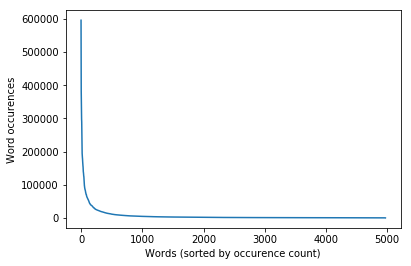

In [9]:
plt.plot(range(0, len(filtered_cnts)), [filtered_cnts[k] for k in s])
plt.xlabel("Words (sorted by occurence count)")
plt.ylabel("Word occurences")
plt.show()

As expected, we are faced with a [Pareto distribution](https://en.wikipedia.org/wiki/Zipf%27s_law).

## WordCloud

We will now generate a word cloud from these word occurences to visualize the frequencies in a different way.

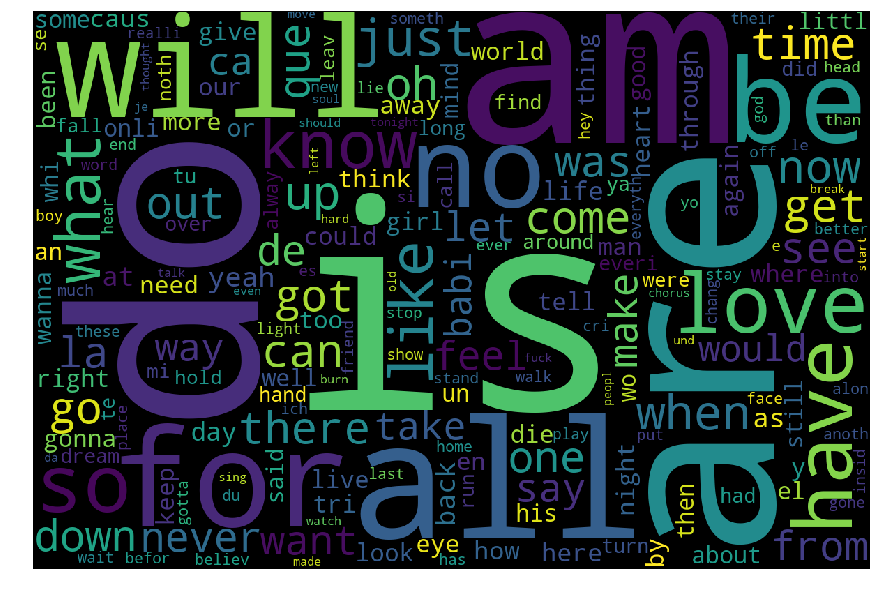

In [11]:
try:
    import wordcloud

    wc = wordcloud.WordCloud(width=1200, height=800)
    wc.generate_from_frequencies(filtered_cnts)
    
    plt.figure(figsize=[15,15])
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
except ImportError:
    print("wordcloud package not installed, use `pip install wordcloud`")